In [1]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/UTFPR-IoT/Dados-Plataforma-Flutuante/main/data-normalizado.csv')

df['date'] = pd.to_datetime(df['date'] + ' ' + df['time'], format='%d/%m/%Y %H:%M:%S', errors='coerce')

df = df.dropna()
df = df.drop('time', axis=1)

df.head()

,date,pH,DO,ORP,Temp
0,2023-04-01 11:42:25,12.40,177.03,-870.0,23.09
1,2023-04-01 11:42:24,12.51,161.04,-940.0,23.09
2,2023-04-01 11:44:10,12.58,159.27,-906.0,-127.00
3,2023-04-01 11:44:10,12.06,175.25,-962.0,-127.00
4,2023-04-01 11:44:20,12.12,177.62,-940.0,-127.00


In [2]:
from datetime import datetime, timedelta
df['date'] = df['date'] + timedelta(days=31)

In [4]:
# Agrupar por intervalos de 10 minutos e calcular a média
df_resampled = df.groupby(pd.Grouper(key='date', freq='10T')).mean()

# Resetar o índice
df_resampled = df_resampled.reset_index()


In [5]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

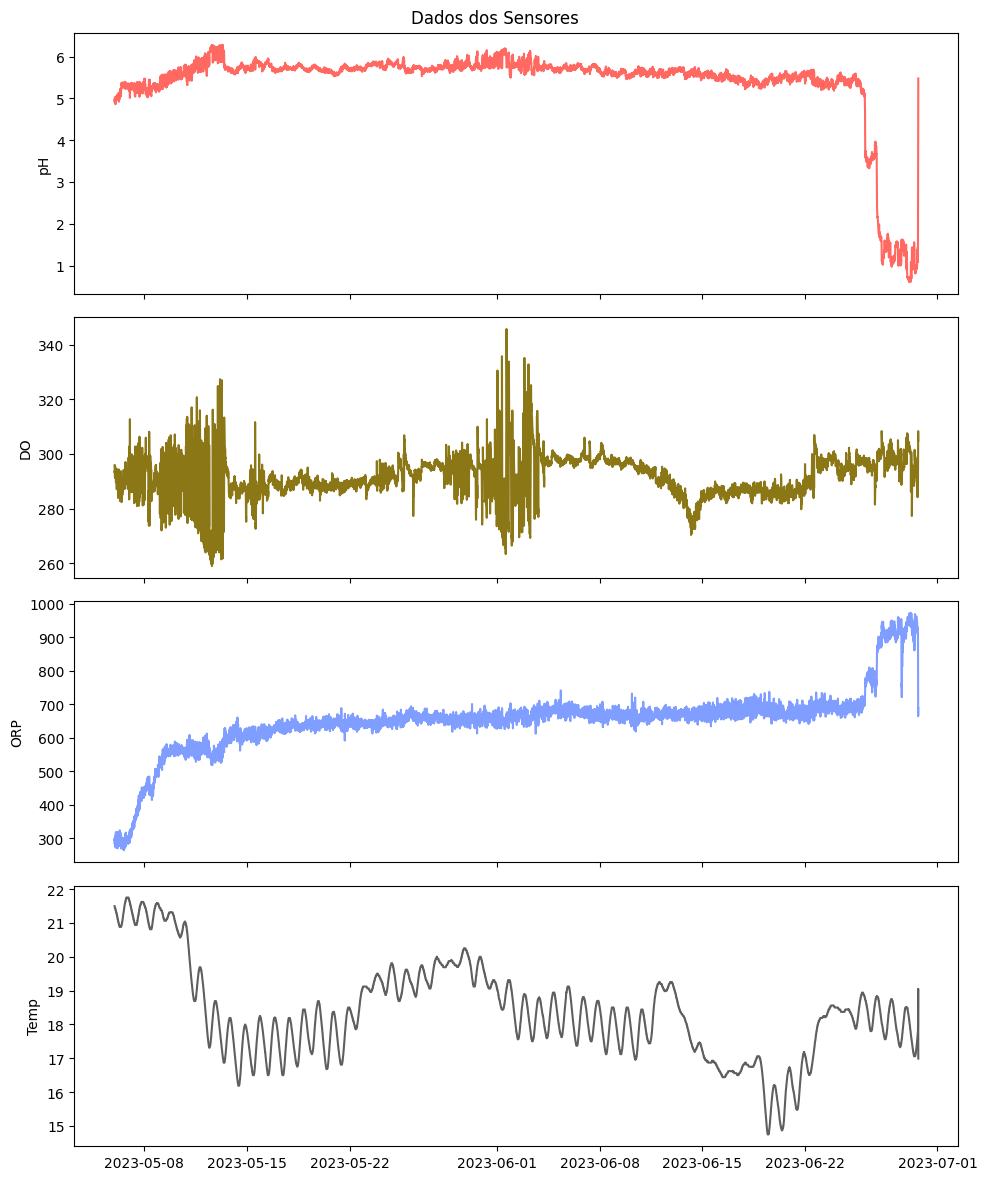

In [8]:
# Selecionar a faixa de data desejada
inicio = pd.to_datetime('2023-5-6 00:00:00')
fim = pd.to_datetime('2023-7-1 00:00:00')
df_selecionado = df_resampled.loc[(df_resampled['date'] >= inicio) & (df_resampled['date'] <= fim)]


# Criar os subplots em uma única coluna
fig, axs = plt.subplots(4, 1, figsize=(10, 12), sharex=True)

# Plotar cada coluna em um subplot
axs[0].plot(df_selecionado['date'], df_selecionado['pH'], color='#ff6961')
axs[0].set_ylabel('pH')

axs[1].plot(df_selecionado['date'], df_selecionado['DO'], color='#8c7717')
axs[1].set_ylabel('DO')

axs[2].plot(df_selecionado['date'], df_selecionado['ORP'], color='#809eff')
axs[2].set_ylabel('ORP')

axs[3].plot(df_selecionado['date'], df_selecionado['Temp'], color='#5e5f61')
axs[3].set_ylabel('Temp')

# Definir o título do gráfico
fig.suptitle('Dados dos Sensores')

# Ajustar o espaçamento entre os subplots
plt.tight_layout()

# Exibir os gráficos
plt.show()